In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import cv2
from tqdm import tqdm

# Load data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
ROOT_FOLDER = './gdrive/My Drive/'
import glob
print('\nContents in the data folder:') 
for x in glob.glob(ROOT_FOLDER+'cats_vs_dogs_data/*'):
  print(x)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).

Contents in the data folder:
./gdrive/My Drive/cats_vs_dogs_data/label_image.npy
./gdrive/My Drive/cats_vs_dogs_data/train_image.npy
./gdrive/My Drive/cats_vs_dogs_data/test_image.npy
./gdrive/My Drive/cats_vs_dogs_data/predictions.npy
./gdrive/My Drive/cats_vs_dogs_data/predictions2.npy
./gdrive/My Drive/cats_vs_dogs_data/predictions3.npy


In [0]:
IMG_TRAIN = np.load(ROOT_FOLDER+'cats_vs_dogs_data/train_image.npy')
IMG_TEST = np.load(ROOT_FOLDER+'cats_vs_dogs_data/test_image.npy')
IMG_TRAIN_Label = np.load(ROOT_FOLDER+'cats_vs_dogs_data/label_image.npy')

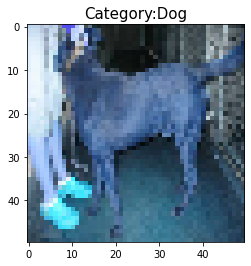

In [0]:
i=0
def draw_image(i):
  plt.imshow(IMG_TRAIN[i,:,:,:])
  if IMG_TRAIN_Label[i] == 1: label= 'Cat'
  elif IMG_TRAIN_Label[i] ==0: label='Dog'
  plt.title("Category:{}".format(label),fontsize=15)
draw_image(15600)

In [0]:
print(IMG_TRAIN.shape)
print(IMG_TEST.shape)
print(IMG_TRAIN_Label.shape)

(25000, 50, 50, 3)
(12500, 50, 50, 3)
(25000, 1)


# CNN MODEL

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
model_cnn = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model_cnn.add(Conv2D(64,(3,3), activation = 'relu', input_shape = (50,50,3)))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model_cnn.add(Conv2D(64,(3,3), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

# Add another
model_cnn.add(Conv2D(64,(3,3), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

# Add another
model_cnn.add(Conv2D(64,(3,3), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          3

In [0]:
X = np.array(IMG_TRAIN).reshape(-1, 50,50,3)
y = np.array(IMG_TRAIN_Label)
X_train=X/255
y_train=y

In [0]:
print(X_train.shape)
print(y_train.shape)
y_train

(25000, 50, 50, 3)
(25000, 1)


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [0]:
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 16ms/step - loss: 0.6495 - accuracy: 0.6303 - val_loss: 0.9170 - val_accuracy: 0.0988
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5790 - accuracy: 0.6955 - val_loss: 1.1558 - val_accuracy: 0.2842
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5037 - accuracy: 0.7513 - val_loss: 0.7292 - val_accuracy: 0.6158
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4390 - accuracy: 0.7940 - val_loss: 0.3086 - val_accuracy: 0.8816
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3851 - accuracy: 0.8267 - val_loss: 0.6679 - val_accuracy: 0.6866
Epoch 6/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3487 - accuracy: 0.8456 - val_loss: 0.5750 - val_accuracy: 0.7392
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3135 - accuracy: 0.8639 - val_loss: 0.4595 - val_accuracy: 0.802

# Prediction

In [0]:
X_test = np.array(IMG_TEST).reshape(-1,50,50,3)
X_test = X_test/255

In [0]:
predictions = model_cnn.predict(X_test)

In [0]:
# float number in predictions
predictions

array([[0.02192964],
       [0.99770135],
       [0.3458731 ],
       ...,
       [0.46238428],
       [0.9990846 ],
       [0.6807166 ]], dtype=float32)

In [0]:
# We are rounding the result here as we used sigmoid function and we got the probablity values in our predicted dataset
predicted_val = [int(round(p[0])) for p in predictions]

In [0]:
# plot first 10 predictions 
predicted_val[0:10]

[0, 1, 0, 1, 0, 1, 1, 0, 0, 1]

# plot the image from test file
see the effect of prediction

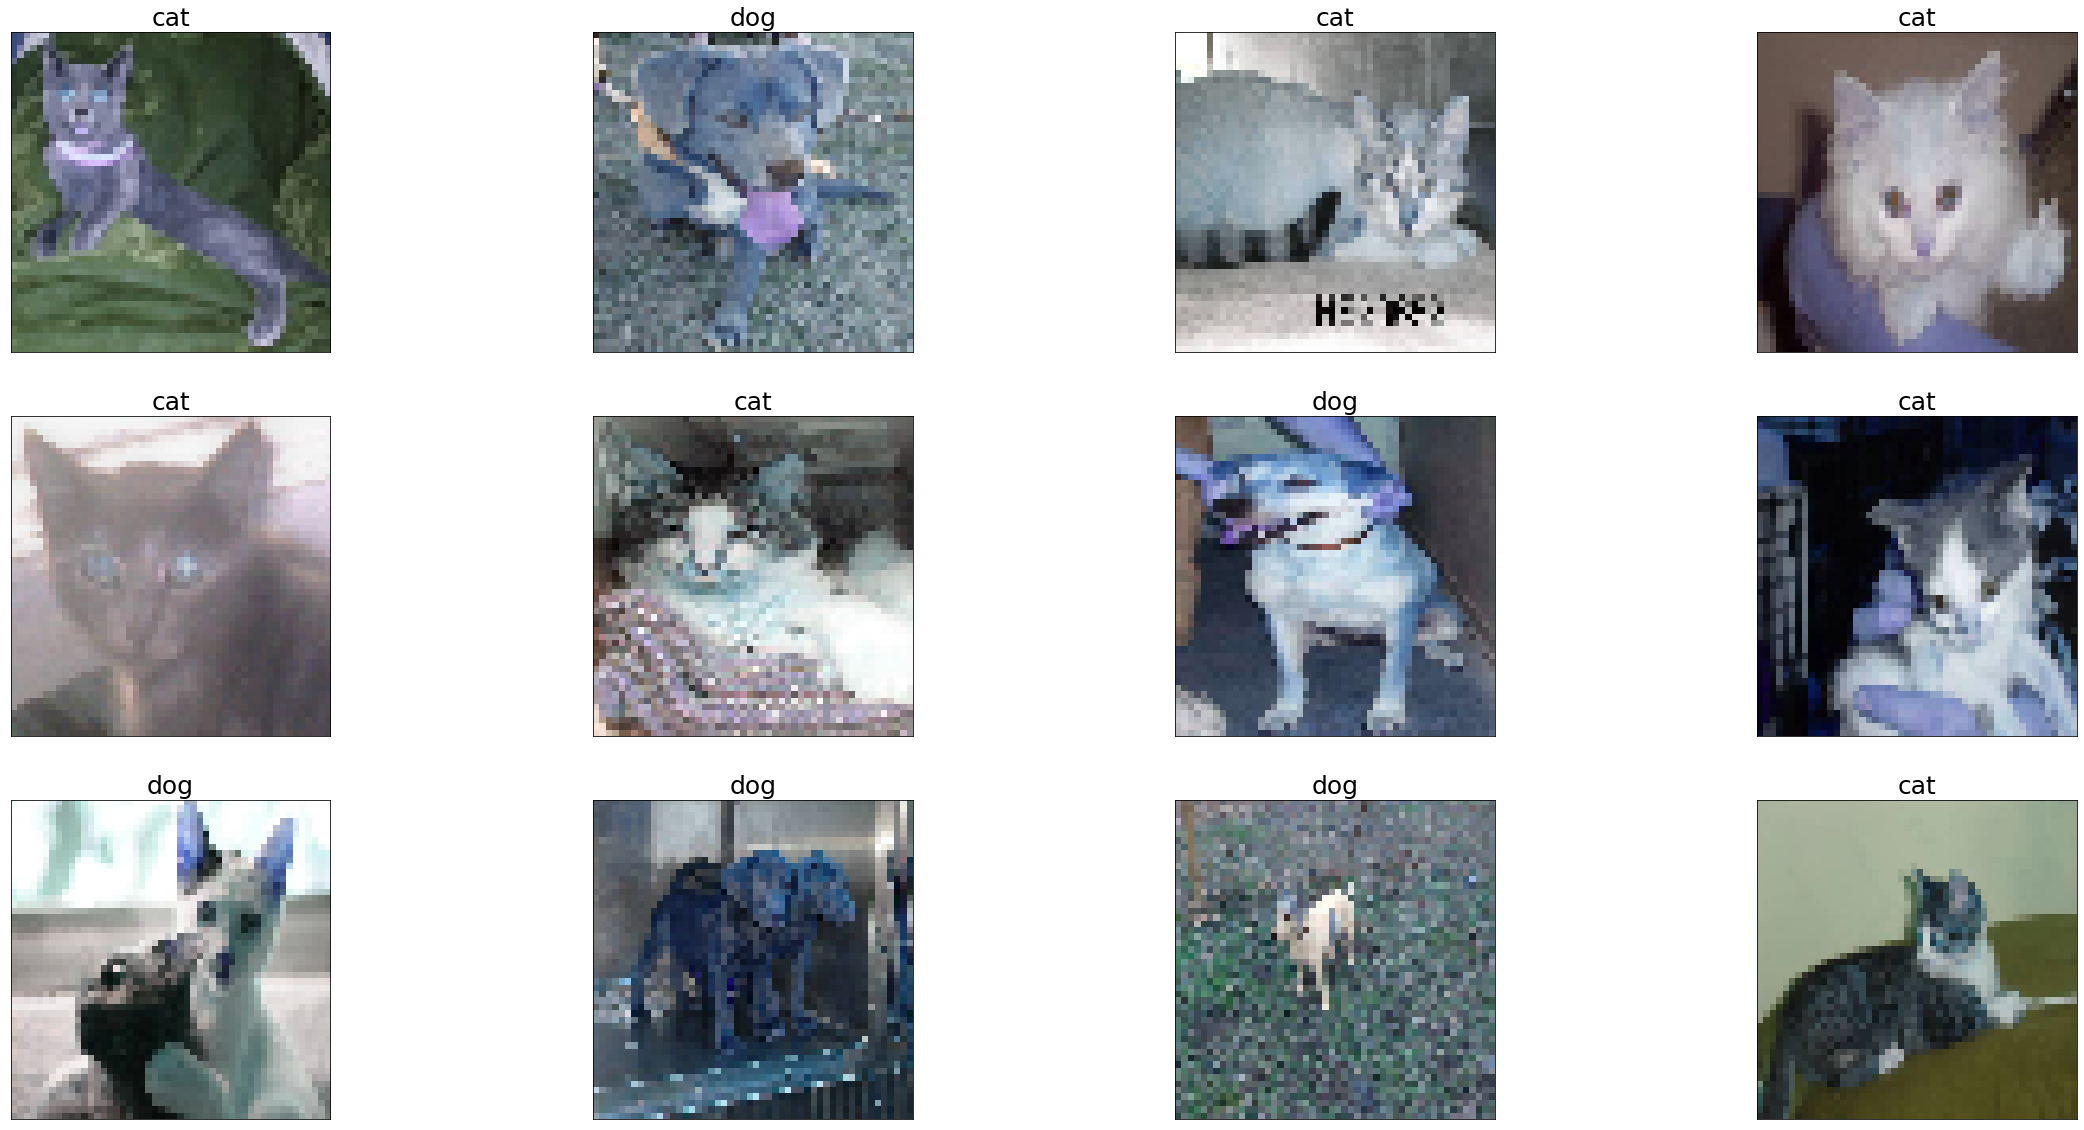

In [0]:
plot_idx=[200,500,8456,400,10000,11000,300,6503,4500,45,12000,10]
fig, axes = plt.subplots(3, 4, figsize=(40, 20),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
i=0
for i, image, ax in zip(plot_idx, IMG_TEST[i,:,:,:], axes.ravel()): 
    ax.imshow(IMG_TEST[i,:,:,:]) 
    if predicted_val[i] == 1:  label='cat'
    elif predicted_val[i] == 0:  label='dog'
    ax.set_title("{}".format(label),fontsize=25)

In [0]:
# save the predicted_val in .npy file
np.save(ROOT_FOLDER+'cats_vs_dogs_data/predictions3.npy',predicted_val)